In [71]:
import pandas as pd
import csv # 打开csv文件
import jieba # 中文分词
import wordcloud # 词云图绘制
from PIL import Image # 用于打开词云背景图片
import numpy as np # 用于将图片转化为数组

In [72]:
with open('莲花楼豆瓣.csv','r',encoding='utf-8') as f:
    danmus_list=list(csv.reader(f))
# print(type(danmus_list))

In [73]:
danmus_clean1=[str(danmus_list).replace(' ','')]
# print(danmus_clean1)

In [74]:
danmus_seg=''.join(danmus_clean1) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

<class 'list'> ['[', '[', "'", '评论', '内容', "'", ']', ',', '[', "'", '这部', '郭虎', '怎么', '这么', '正常', '，', '完全', '是', 'OK', '的', '呀', '。', '整体', '还', '不错', '，', '最', '受不了', '的', 'bug', '是', '他们', '都', '认不出来', '李相夷', '…', '…', '结尾', '可以', '，', '单孤刀', '前面', '一直', '跟个', '傻', '逼', '似的', '，', '但', '结局', '还是', '加', '了', '点', '悲剧感', '，', '云彼丘', '也', '不', '容易', '。', '唯一', '一直', '小丑', '的', '是', '肖紫矜', '，', '编剧', '对普', '男', '着实', '有点', '恶意', '。', '感觉', '这个', '剧对', '肖顺尧', '很', '加分', '，', '人设', '和', '演绎', '都', '好', '。', '成毅', '中', '庭长', '得', '不错', '，', '会', '用', '眼睛', '演戏', '，', '也', '很', '能', '投入', '角色', '，', '就', '容易', '让', '人', '原谅', '他', '颜值', '和', '台词', '的', '短板', '。', '李', '莲花', '，', '嘴贱', '的', '过日子', '人', '，', '活在', '当下', '，', '也', '吸粉', '。', '友情', '线', '人物', '关系', '很', '好', '。', '反派', '整体', '来说', '不太给力', '，', '还是', '没有', '把', '金庸', '古龙', '学', '到位', "'", ']', ',', '[', "'", '终于', '看', '完', '了', '，', '前面', '还', '不', '觉得', '有', '什么', '好', '，', '没想到', '看', '完', '大结局', '之后', '越想', '越', '上头', '，', '

In [75]:
danmus_clean2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_clean2)

['评论', '内容', '这部', '郭虎', '怎么', '这么', '正常', '完全', 'OK', '整体', '不错', '受不了', 'bug', '他们', '认不出来', '李相夷', '结尾', '可以', '单孤刀', '前面', '一直', '跟个', '似的', '结局', '还是', '悲剧感', '云彼丘', '容易', '唯一', '一直', '小丑', '肖紫矜', '编剧', '对普', '着实', '有点', '恶意', '感觉', '这个', '剧对', '肖顺尧', '加分', '人设', '演绎', '成毅', '庭长', '不错', '眼睛', '演戏', '投入', '角色', '容易', '原谅', '颜值', '台词', '短板', '莲花', '嘴贱', '过日子', '活在', '当下', '吸粉', '友情', '人物', '关系', '反派', '整体', '来说', '不太给力', '还是', '没有', '金庸', '古龙', '到位', '终于', '前面', '觉得', '什么', '没想到', '大结局', '之后', '越想', '上头', '彻底', '迷上', '虽然', '分集', '分场', '一些', '灌水', '避重就轻', '问题', '主线', '设计', '太牛', '李相夷', '那样', '身份', '注定', '只能', '江湖', '相忘', '加上', '成毅', '演技', '莲花', '这个', '角色', '永远', '活在', '我们', '心中', '永垂不朽', '18', '集快', '进掉', '感情', '编剧', '18', '集起', '四星', '整体', '反转', '构思', '致敬', '钱德勒', '典中典', '漫长', '告别', '李大花', '设定', '心境', '致敬', '查拉', '斯特拉', '狮子', '骆驼', '小孩', '老庄', '虚无主义', '滋养', '组队', '莲花', '魔头', '设定', '参考', '古龙', '钱德勒', '对白', '文风', '小李飞刀', '身世', '不明', '探花', '师弟', '夺林', '诗音', '两肋插刀', '西门', '吹雪', '武痴', '不

In [76]:
with open('cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_clean2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result=outstr.split() # 将结果转换为list格式
print(type(result),result)

<class 'list'> ['评论', '内容', '这部', '郭虎', '怎么', '这么', '正常', '完全', 'OK', '整体', '不错', '受不了', 'bug', '他们', '认不出来', '李相夷', '结尾', '可以', '单孤刀', '前面', '一直', '跟个', '似的', '结局', '还是', '悲剧感', '云彼丘', '容易', '唯一', '一直', '小丑', '肖紫矜', '编剧', '对普', '着实', '有点', '恶意', '感觉', '这个', '剧对', '肖顺尧', '加分', '人设', '演绎', '成毅', '庭长', '不错', '眼睛', '演戏', '投入', '角色', '容易', '原谅', '颜值', '台词', '短板', '莲花', '嘴贱', '过日子', '活在', '当下', '吸粉', '友情', '人物', '关系', '反派', '整体', '来说', '不太给力', '还是', '没有', '金庸', '古龙', '到位', '终于', '前面', '觉得', '什么', '没想到', '大结局', '之后', '越想', '上头', '彻底', '迷上', '虽然', '分集', '分场', '一些', '灌水', '避重就轻', '问题', '主线', '设计', '太牛', '李相夷', '那样', '身份', '注定', '只能', '江湖', '相忘', '加上', '成毅', '演技', '莲花', '这个', '角色', '永远', '活在', '我们', '心中', '永垂不朽', '18', '集快', '进掉', '感情', '编剧', '18', '集起', '四星', '整体', '反转', '构思', '致敬', '钱德勒', '典中典', '漫长', '告别', '李大花', '设定', '心境', '致敬', '查拉', '斯特拉', '狮子', '骆驼', '小孩', '老庄', '虚无主义', '滋养', '组队', '莲花', '魔头', '设定', '参考', '古龙', '钱德勒', '对白', '文风', '小李飞刀', '身世', '不明', '探花', '师弟', '夺林', '诗音', '两肋插刀', '西门',

In [77]:
wordsDict = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_seq = sorted(wordsDict.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_seq[:200]

[('莲花', 217),
 ('剧情', 146),
 ('成毅', 104),
 ('不错', 101),
 ('没有', 98),
 ('真的', 89),
 ('武侠', 88),
 ('江湖', 87),
 ('喜欢', 83),
 ('还是', 80),
 ('一个', 80),
 ('好看', 78),
 ('李相夷', 75),
 ('可以', 73),
 ('演技', 73),
 ('这个', 71),
 ('但是', 70),
 ('角色', 68),
 ('有点', 66),
 ('故事', 63),
 ('就是', 63),
 ('最后', 62),
 ('自己', 61),
 ('探案', 56),
 ('人物', 55),
 ('破案', 51),
 ('感觉', 50),
 ('男主', 50),
 ('演员', 49),
 ('不是', 46),
 ('台词', 44),
 ('结局', 43),
 ('人设', 43),
 ('这么', 42),
 ('飞声', 42),
 ('觉得', 41),
 ('什么', 41),
 ('十年', 40),
 ('案子', 39),
 ('主线', 36),
 ('确实', 36),
 ('不过', 35),
 ('悬疑', 34),
 ('看到', 34),
 ('特别', 32),
 ('很多', 31),
 ('开始', 30),
 ('案件', 30),
 ('一部', 30),
 ('部分', 30),
 ('节奏', 29),
 ('有些', 29),
 ('少年', 29),
 ('主角', 29),
 ('几个', 28),
 ('小宝', 28),
 ('还有', 27),
 ('原著', 27),
 ('虽然', 26),
 ('武侠剧', 26),
 ('方多病', 26),
 ('一直', 25),
 ('其实', 25),
 ('角姐', 25),
 ('时候', 25),
 ('这种', 25),
 ('那么', 24),
 ('几集', 24),
 ('实在', 24),
 ('这部', 23),
 ('后面', 23),
 ('打戏', 23),
 ('可爱', 22),
 ('精彩', 22),
 ('因为', 22),
 ('放下', 22),
 ('前面

In [78]:
stopWords = ["没有","真的","还是","一个","可以","这个","但是","有点","就是","最后","感觉","不是","这么","什么","确实","不过","觉得","看到","特别","很多","一部","有些","几个","还有","虽然","一直","其实","这种","那么","实在","这部","因为","一点","比较","可能","非常","而且","一些","这样","现在","那个","几集","前面","后面","单元","莲花","如果","最好","只有","看过","为什么","出来","之前","每个","居然","那些","不能","只是","终于","get","一起","然后","这些"]
for word in stopWords:
    if word in wordsDict:
        del wordsDict[word] #删除对应的词

wordsDict_seq = sorted(wordsDict.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_seq[:70]

[('剧情', 146),
 ('成毅', 104),
 ('不错', 101),
 ('武侠', 88),
 ('江湖', 87),
 ('喜欢', 83),
 ('好看', 78),
 ('李相夷', 75),
 ('演技', 73),
 ('角色', 68),
 ('故事', 63),
 ('自己', 61),
 ('探案', 56),
 ('人物', 55),
 ('破案', 51),
 ('男主', 50),
 ('演员', 49),
 ('台词', 44),
 ('结局', 43),
 ('人设', 43),
 ('飞声', 42),
 ('十年', 40),
 ('案子', 39),
 ('主线', 36),
 ('悬疑', 34),
 ('开始', 30),
 ('案件', 30),
 ('部分', 30),
 ('节奏', 29),
 ('少年', 29),
 ('主角', 29),
 ('小宝', 28),
 ('原著', 27),
 ('武侠剧', 26),
 ('方多病', 26),
 ('角姐', 25),
 ('时候', 25),
 ('打戏', 23),
 ('可爱', 22),
 ('精彩', 22),
 ('放下', 22),
 ('设定', 21),
 ('古装', 21),
 ('推理', 21),
 ('剧本', 21),
 ('感情', 20),
 ('整体', 19),
 ('反派', 19),
 ('没想到', 18),
 ('电视剧', 18),
 ('塑造', 18),
 ('问题', 17),
 ('有意思', 17),
 ('知道', 17),
 ('好剧', 17),
 ('上头', 16),
 ('反转', 16),
 ('难得', 16),
 ('希望', 16),
 ('成长', 16),
 ('人生', 15),
 ('三人组', 15),
 ('一样', 15),
 ('三个', 15),
 ('一般', 15),
 ('逻辑', 15),
 ('特效', 15),
 ('编剧', 14),
 ('古龙', 14),
 ('有趣', 14)]

In [79]:
!pip install wordcloud

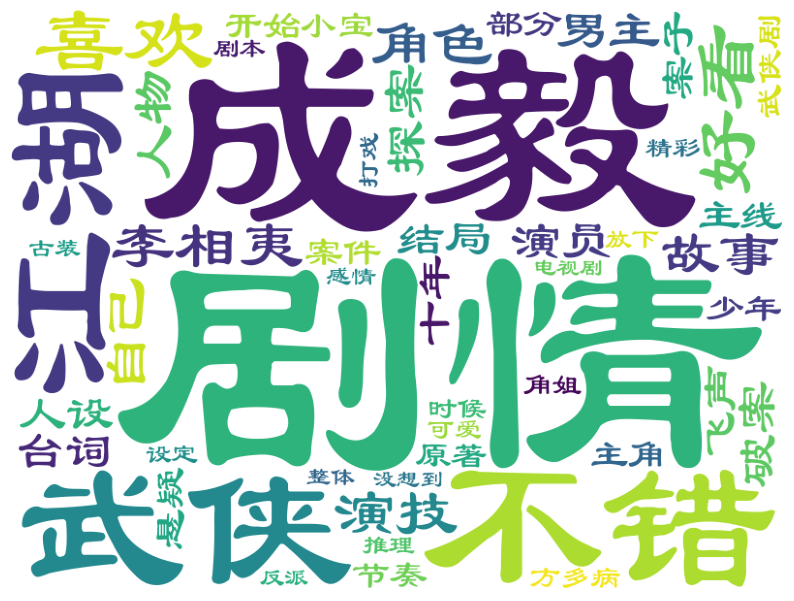

In [80]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='HGLS_CNKI.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [81]:
!pip install snownlp

In [82]:
import pandas as pd

data = danmus_list  # 将DataFrame赋值给'data'变量
data = pd.DataFrame(data, columns=['评论内容'])  # 将列表转换为DataFrame
# 使用snownlp对每条评论进行评分

from snownlp import SnowNLP
import numpy as np
import pandas as pd

# 假设你的代码的其余部分已经正确导入了所需的库

def sent_score(comm):
    sents = SnowNLP(comm).sentences
    sent_score = np.mean([SnowNLP(sent).sentiments for sent in sents])
    return sent_score

# 假设你已经定义并初始化了'data'变量

data['comm_sent_score'] = data['评论内容'].map(sent_score)


In [83]:
data.sample(10)

,评论内容,comm_sent_score
535,谁能不爱少年意气。,0.321937
184,热血武侠探案，打戏特别燃,0.937064
261,难寻少年时，总有少年来，不做神仙的成毅这不也挺有趣，曾舜晞角色精髓抓的也好，改动不少，不过可...,0.727435
542,看了12集，自认为很有耐心了，但还是被难看到。头套真的太丑了，规整到鬓角，十分假。成毅长相这...,0.578177
529,我的天呐，这么多年没看过这么惊艳的剧了，激动的不行，这些年看的都是注水剧，这剧一点没注水，牛...,0.648547
119,到了皇宫部分开始崩塌，这皇宫的防守就这么不严密啊……还有破案基本靠口述也有点敷衍，女宅案血莲...,0.699251
186,看之前是觉得成毅演李相夷可能是不行的，毕竟李相夷实在太惊才绝艳，但是成毅的李莲花是演的真好…...,0.530537
192,本来以为是我自己小时候那种一天能写八段的无脑英雄剧本，强人设强剧设：主角出场年少已经四顾无敌...,0.672386
569,小舟从此逝，江海寄余生。去去重又重，来时是来时。李莲花这一辈确实干什么都是徒劳的，打到最后自...,0.502194
259,虽然很好看却总是让人有点不忍心看下去，李莲花整个人物的悲剧底色太沉浸了，有种以插科打诨却深度...,0.839142


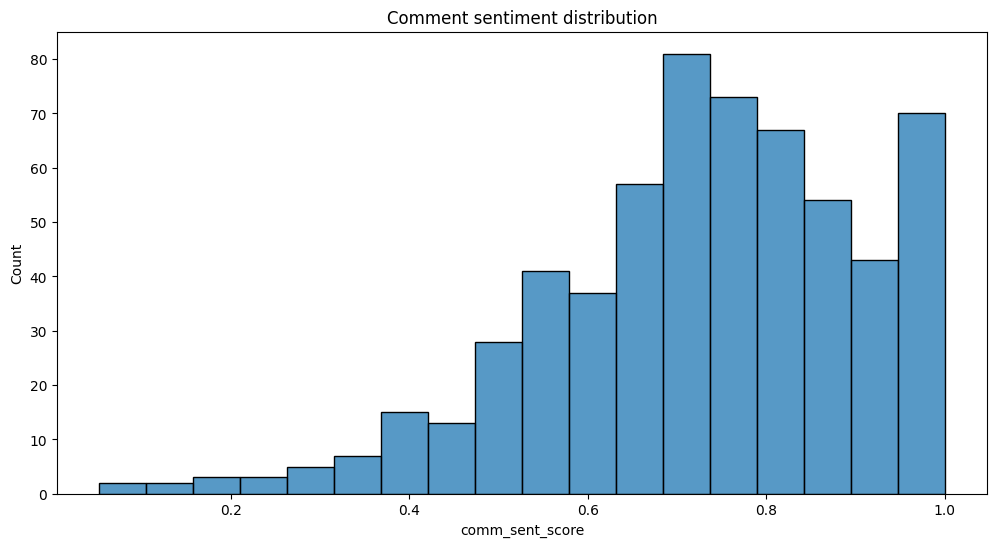

In [84]:
# 查看情感评分的分布情况

import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的代码的其他部分已经正确导入了所需的库

plt.figure(figsize=(12, 6))
sns.histplot(data['comm_sent_score'], kde=False)
plt.title('Comment sentiment distribution')
plt.show()

In [85]:
h_data = data[data.comm_sent_score>=0.7]
l_data = data[data.comm_sent_score<0.7]

In [86]:
print(h_data.shape)
print(l_data.shape)

(367, 2)
(234, 2)


In [87]:
# 导出h_data为CSV文件
h_data.to_csv('h_data.csv', index=False)

In [88]:
with open('h_data.csv','r',encoding='utf-8') as f:
    list_h=list(csv.reader(f))
# print(type(list_h))

In [89]:
danmus_list_h=[str(list_h).replace(' ','')]
# print(danmus_list_h)

In [90]:
danmus_seg=''.join(danmus_list_h) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

<class 'list'> ['[', '[', "'", '评论', '内容', "'", ',', "'", 'comm', '_', 'sent', '_', 'score', "'", ']', ',', '[', "'", '这部', '郭虎', '怎么', '这么', '正常', '，', '完全', '是', 'OK', '的', '呀', '。', '整体', '还', '不错', '，', '最', '受不了', '的', 'bug', '是', '他们', '都', '认不出来', '李相夷', '…', '…', '结尾', '可以', '，', '单孤刀', '前面', '一直', '跟个', '傻', '逼', '似的', '，', '但', '结局', '还是', '加', '了', '点', '悲剧感', '，', '云彼丘', '也', '不', '容易', '。', '唯一', '一直', '小丑', '的', '是', '肖紫矜', '，', '编剧', '对普', '男', '着实', '有点', '恶意', '。', '感觉', '这个', '剧对', '肖顺尧', '很', '加分', '，', '人设', '和', '演绎', '都', '好', '。', '成毅', '中', '庭长', '得', '不错', '，', '会', '用', '眼睛', '演戏', '，', '也', '很', '能', '投入', '角色', '，', '就', '容易', '让', '人', '原谅', '他', '颜值', '和', '台词', '的', '短板', '。', '李', '莲花', '，', '嘴贱', '的', '过日子', '人', '，', '活在', '当下', '，', '也', '吸粉', '。', '友情', '线', '人物', '关系', '很', '好', '。', '反派', '整体', '来说', '不太给力', '，', '还是', '没有', '把', '金庸', '古龙', '学', '到位', "'", ',', "'", '0.7323266752070077', "'", ']', ',', '[', "'", '前', '18', '集快', '进掉', '感情', '线', '

In [91]:
danmus_list_h2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_list_h2)

['评论', '内容', 'comm', 'sent', 'score', '这部', '郭虎', '怎么', '这么', '正常', '完全', 'OK', '整体', '不错', '受不了', 'bug', '他们', '认不出来', '李相夷', '结尾', '可以', '单孤刀', '前面', '一直', '跟个', '似的', '结局', '还是', '悲剧感', '云彼丘', '容易', '唯一', '一直', '小丑', '肖紫矜', '编剧', '对普', '着实', '有点', '恶意', '感觉', '这个', '剧对', '肖顺尧', '加分', '人设', '演绎', '成毅', '庭长', '不错', '眼睛', '演戏', '投入', '角色', '容易', '原谅', '颜值', '台词', '短板', '莲花', '嘴贱', '过日子', '活在', '当下', '吸粉', '友情', '人物', '关系', '反派', '整体', '来说', '不太给力', '还是', '没有', '金庸', '古龙', '到位', '0.7323266752070077', '18', '集快', '进掉', '感情', '编剧', '18', '集起', '四星', '整体', '反转', '构思', '致敬', '钱德勒', '典中典', '漫长', '告别', '李大花', '设定', '心境', '致敬', '查拉', '斯特拉', '狮子', '骆驼', '小孩', '老庄', '虚无主义', '滋养', '组队', '莲花', '魔头', '设定', '参考', '古龙', '钱德勒', '对白', '文风', '小李飞刀', '身世', '不明', '探花', '师弟', '夺林', '诗音', '两肋插刀', '西门', '吹雪', '武痴', '不近', '女色', '美女', '设定', '对应', '仙儿', '美色', '观音', '武功', '高强', '合体', '0.7169080853112603', '曾经', '最强', '变成', '一个', '半死不活', '满嘴', '火车', '老狐狸', '单纯', '正义', '徒弟', '失忆', '凶恶', '反派', '一起', '走江湖', '探案', '冒

In [92]:
with open('cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_list_h2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result_h=outstr.split() # 将结果转换为list格式
print(type(result_h),result_h)

<class 'list'> ['评论', '内容', 'comm', 'sent', 'score', '这部', '郭虎', '怎么', '这么', '正常', '完全', 'OK', '整体', '不错', '受不了', 'bug', '他们', '认不出来', '李相夷', '结尾', '可以', '单孤刀', '前面', '一直', '跟个', '似的', '结局', '还是', '悲剧感', '云彼丘', '容易', '唯一', '一直', '小丑', '肖紫矜', '编剧', '对普', '着实', '有点', '恶意', '感觉', '这个', '剧对', '肖顺尧', '加分', '人设', '演绎', '成毅', '庭长', '不错', '眼睛', '演戏', '投入', '角色', '容易', '原谅', '颜值', '台词', '短板', '莲花', '嘴贱', '过日子', '活在', '当下', '吸粉', '友情', '人物', '关系', '反派', '整体', '来说', '不太给力', '还是', '没有', '金庸', '古龙', '到位', '0.7323266752070077', '18', '集快', '进掉', '感情', '编剧', '18', '集起', '四星', '整体', '反转', '构思', '致敬', '钱德勒', '典中典', '漫长', '告别', '李大花', '设定', '心境', '致敬', '查拉', '斯特拉', '狮子', '骆驼', '小孩', '老庄', '虚无主义', '滋养', '组队', '莲花', '魔头', '设定', '参考', '古龙', '钱德勒', '对白', '文风', '小李飞刀', '身世', '不明', '探花', '师弟', '夺林', '诗音', '两肋插刀', '西门', '吹雪', '武痴', '不近', '女色', '美女', '设定', '对应', '仙儿', '美色', '观音', '武功', '高强', '合体', '0.7169080853112603', '曾经', '最强', '变成', '一个', '半死不活', '满嘴', '火车', '老狐狸', '单纯', '正义', '徒弟', '失忆', '凶恶', '反派', '一起', 

In [93]:
wordsDict_h = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict_h.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict_h[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_h_seq = sorted(wordsDict_h.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_h_seq[:100]

[('莲花', 150),
 ('剧情', 90),
 ('不错', 84),
 ('江湖', 70),
 ('没有', 66),
 ('武侠', 64),
 ('成毅', 60),
 ('还是', 56),
 ('真的', 56),
 ('喜欢', 54),
 ('好看', 52),
 ('可以', 50),
 ('角色', 49),
 ('一个', 47),
 ('演技', 47),
 ('这个', 46),
 ('李相夷', 43),
 ('但是', 43),
 ('故事', 40),
 ('人物', 38),
 ('探案', 38),
 ('破案', 38),
 ('有点', 36),
 ('自己', 36),
 ('就是', 34),
 ('演员', 34),
 ('结局', 33),
 ('人设', 33),
 ('最后', 32),
 ('感觉', 30),
 ('案子', 30),
 ('男主', 29),
 ('不过', 28),
 ('悬疑', 27),
 ('特别', 27),
 ('很多', 25),
 ('台词', 24),
 ('一部', 24),
 ('飞声', 23),
 ('确实', 23),
 ('什么', 23),
 ('十年', 23),
 ('不是', 23),
 ('这么', 21),
 ('主线', 21),
 ('主角', 21),
 ('部分', 21),
 ('节奏', 19),
 ('几个', 19),
 ('小宝', 19),
 ('案件', 19),
 ('整体', 18),
 ('可爱', 18),
 ('有些', 18),
 ('武侠剧', 18),
 ('觉得', 18),
 ('看到', 18),
 ('少年', 18),
 ('古装', 17),
 ('原著', 17),
 ('时候', 17),
 ('角姐', 17),
 ('虽然', 17),
 ('开始', 16),
 ('后面', 16),
 ('打戏', 16),
 ('这种', 16),
 ('好剧', 16),
 ('这部', 15),
 ('有意思', 15),
 ('其实', 15),
 ('几集', 15),
 ('方多病', 15),
 ('设定', 14),
 ('难得', 14),
 ('非常', 14),
 ('推理',

In [94]:
stopWords = ["真的","就是","莲花","但是","还是","可以","没有","这个","后面","自己","有点","感觉","不是","这部","因为","觉得","什么","不能","看到","虽然","一直","还有","其实","这么","确实","时候","怎么","开始","知道","最后","那么","非常","之后","这种","这样","部分","为了","其他","很多","不行","现在","所以","一点","get","已经","真是","如果","除了","不过","而且","几个","然后","为什么","发现","看过","完全","可能","出来","应该","有些","那样","一样","居然","越来越","看着","下去","实在","不到","只有","竟然","起来","只能","不了","不想","里面"]
for word in stopWords:
    if word in wordsDict_h:
        del wordsDict_h[word] #删除对应的词

wordsDict_h_seq = sorted(wordsDict_h.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_h_seq[:50]

[('剧情', 90),
 ('不错', 84),
 ('江湖', 70),
 ('武侠', 64),
 ('成毅', 60),
 ('喜欢', 54),
 ('好看', 52),
 ('角色', 49),
 ('一个', 47),
 ('演技', 47),
 ('李相夷', 43),
 ('故事', 40),
 ('人物', 38),
 ('探案', 38),
 ('破案', 38),
 ('演员', 34),
 ('结局', 33),
 ('人设', 33),
 ('案子', 30),
 ('男主', 29),
 ('悬疑', 27),
 ('特别', 27),
 ('台词', 24),
 ('一部', 24),
 ('飞声', 23),
 ('十年', 23),
 ('主线', 21),
 ('主角', 21),
 ('节奏', 19),
 ('小宝', 19),
 ('案件', 19),
 ('整体', 18),
 ('可爱', 18),
 ('武侠剧', 18),
 ('少年', 18),
 ('古装', 17),
 ('原著', 17),
 ('角姐', 17),
 ('打戏', 16),
 ('好剧', 16),
 ('有意思', 15),
 ('几集', 15),
 ('方多病', 15),
 ('设定', 14),
 ('难得', 14),
 ('推理', 13),
 ('精彩', 13),
 ('那个', 13),
 ('最好', 13),
 ('放下', 13)]

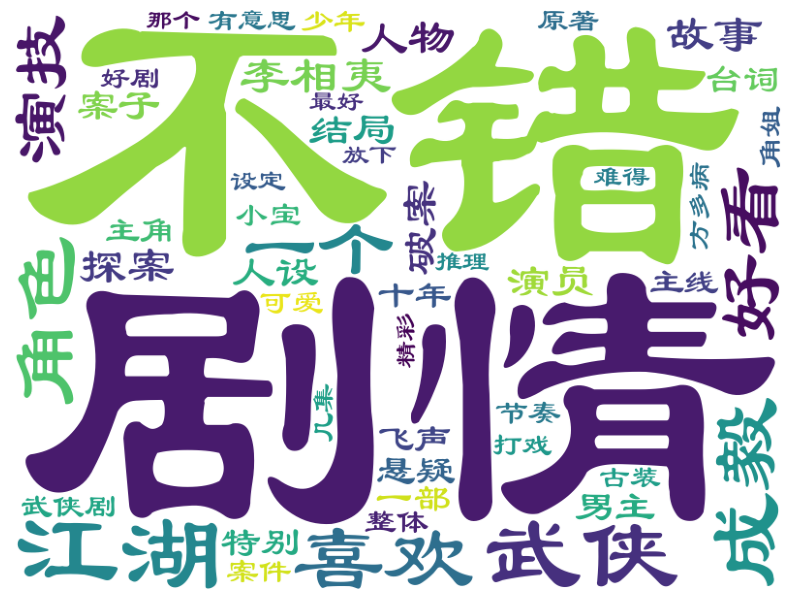

In [95]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='HGLS_CNKI.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_h_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [96]:
# 导出h_data为CSV文件
l_data.to_csv('l_data.csv', index=False)

In [97]:
with open('l_data.csv','r',encoding='utf-8') as f:
    list_l=list(csv.reader(f))
# print(type(list_l))

In [98]:
danmus_list_l=[str(list_l).replace(' ','')]
# print(danmus_list_l)

In [99]:
danmus_seg=''.join(danmus_list_l) # 将文本数据转换为字符串格式
words=list(jieba.lcut(danmus_seg)) # 利用jieba库进行分词
print(type(words),words)

<class 'list'> ['[', '[', "'", '评论', '内容', "'", ',', "'", 'comm', '_', 'sent', '_', 'score', "'", ']', ',', '[', "'", '评论', '内容', "'", ',', "'", '0.30925383096110126', "'", ']', ',', '[', "'", '终于', '看', '完', '了', '，', '前面', '还', '不', '觉得', '有', '什么', '好', '，', '没想到', '看', '完', '大结局', '之后', '越想', '越', '上头', '，', '彻底', '迷上', '了', '。', '虽然', '分集', '和', '分场', '有', '一些', '灌水', '和', '避重就轻', '的', '问题', '，', '但', '主线', '设计', '太牛', '了', '，', '李相夷', '那样', '的', '身份', '，', '注定', '只能', '江湖', '相忘', '。', '加上', '成毅', '的', '演技', '，', '李', '莲花', '这个', '角色', '永远', '活在', '我们', '心中', '，', '永垂不朽', '！', "'", ',', "'", '0.6851987179943895', "'", ']', ',', '[', "'", '没想', '过', '一个', '质感', '这么', '差', '的', '电视剧', '可以', '讲', '这么', '深', '的', '人生', '道理', '，', '比起', '世界', '上太多花', '一百万', '放', '十块钱', '的', '屁', '的', '事情', '，', '这个', '玩意儿', '好像', '是', '在', '花', '十块钱', '给', '你', '放', '了', '一百万', '的', '烟花', '。', "'", ',', "'", '0.5385710222347869', "'", ']', ',', '[', "'", '剧情', '不错', '，', '虽然', '有', '槽', '点', '。', '演技',

In [100]:
danmus_list_l2 = [word for word in words if len(word)>1] # 保留长度>1的变量
print(danmus_list_l2)

['评论', '内容', 'comm', 'sent', 'score', '评论', '内容', '0.30925383096110126', '终于', '前面', '觉得', '什么', '没想到', '大结局', '之后', '越想', '上头', '彻底', '迷上', '虽然', '分集', '分场', '一些', '灌水', '避重就轻', '问题', '主线', '设计', '太牛', '李相夷', '那样', '身份', '注定', '只能', '江湖', '相忘', '加上', '成毅', '演技', '莲花', '这个', '角色', '永远', '活在', '我们', '心中', '永垂不朽', '0.6851987179943895', '没想', '一个', '质感', '这么', '电视剧', '可以', '这么', '人生', '道理', '比起', '世界', '上太多花', '一百万', '十块钱', '事情', '这个', '玩意儿', '好像', '十块钱', '一百万', '烟花', '0.5385710222347869', '剧情', '不错', '虽然', '演技', '觉得', '没有', '那么', '成毅', '长安', '诺里', '演技', '差不多', '曾演', '不错', '肖顺尧', '气质', '肖曾', '简直', '内外', '友情', '变化', '简直', '一模一样', '看不顺眼', '好友', '编剧', '还是', '心软', '没有', '真正', '莲花', '明确', '而是', 'be', 'oe', '还有', '就是', '紫矜', '角色', '到底', '干嘛', '其他人', '该死', '那么', '隐身', '开始', '逼死', '男主', '再出', '暗中', '利用', '身份', '散步', '李相夷', '谣言', '抹黑', '最后', '莲花', '赴约', '飞声', '导致', '短剑', '跳江', '为什么', '要乔', '姑娘', '喜欢', '还要', '成亲', '然后', '离开', '搞不懂', '0.5979519368419334', '一夜', '八集', '0.6687365059472464', '角姐', '角笛'

In [101]:
with open('cn_stopwords.txt','r',encoding='utf-8') as sw:
    stopwords_list=list(csv.reader(sw)) # 打开停用词表并转换为列表格式
outstr='' # 设置空字符串，用于储存停用词表过滤后的分词
for word in danmus_list_l2: # 遍历分词后列表中的每一个单词
    if word not in stopwords_list: # 如果单词不在停用词表中
        if word != '\t': # 如果单词不为制表符
            outstr += word # 将该单词加入字符串中
            outstr += ' ' # 将结果以空格隔开
result_l=outstr.split() # 将结果转换为list格式
print(type(result_l),result_l)

<class 'list'> ['评论', '内容', 'comm', 'sent', 'score', '评论', '内容', '0.30925383096110126', '终于', '前面', '觉得', '什么', '没想到', '大结局', '之后', '越想', '上头', '彻底', '迷上', '虽然', '分集', '分场', '一些', '灌水', '避重就轻', '问题', '主线', '设计', '太牛', '李相夷', '那样', '身份', '注定', '只能', '江湖', '相忘', '加上', '成毅', '演技', '莲花', '这个', '角色', '永远', '活在', '我们', '心中', '永垂不朽', '0.6851987179943895', '没想', '一个', '质感', '这么', '电视剧', '可以', '这么', '人生', '道理', '比起', '世界', '上太多花', '一百万', '十块钱', '事情', '这个', '玩意儿', '好像', '十块钱', '一百万', '烟花', '0.5385710222347869', '剧情', '不错', '虽然', '演技', '觉得', '没有', '那么', '成毅', '长安', '诺里', '演技', '差不多', '曾演', '不错', '肖顺尧', '气质', '肖曾', '简直', '内外', '友情', '变化', '简直', '一模一样', '看不顺眼', '好友', '编剧', '还是', '心软', '没有', '真正', '莲花', '明确', '而是', 'be', 'oe', '还有', '就是', '紫矜', '角色', '到底', '干嘛', '其他人', '该死', '那么', '隐身', '开始', '逼死', '男主', '再出', '暗中', '利用', '身份', '散步', '李相夷', '谣言', '抹黑', '最后', '莲花', '赴约', '飞声', '导致', '短剑', '跳江', '为什么', '要乔', '姑娘', '喜欢', '还要', '成亲', '然后', '离开', '搞不懂', '0.5979519368419334', '一夜', '八集', '0.66873650594724

In [102]:
wordsDict_l = {} #新建字典用于储存词及词频
for word in words:
    if len(word) == 1: #单个的字符不作为词放入字典
        continue
    else:
        wordsDict_l.setdefault(word, 0) #设置词的初始出现次数为0
        wordsDict_l[word] +=1 #对于重复出现的词，每出现一次，次数增加1

wordsDict_l_seq = sorted(wordsDict_l.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_l_seq[:100]

[('莲花', 67),
 ('剧情', 56),
 ('成毅', 44),
 ('一个', 33),
 ('真的', 33),
 ('李相夷', 32),
 ('没有', 32),
 ('最后', 30),
 ('有点', 30),
 ('就是', 29),
 ('喜欢', 29),
 ('但是', 27),
 ('演技', 26),
 ('好看', 26),
 ('这个', 25),
 ('自己', 25),
 ('还是', 24),
 ('武侠', 24),
 ('觉得', 23),
 ('可以', 23),
 ('故事', 23),
 ('不是', 23),
 ('这么', 21),
 ('男主', 21),
 ('感觉', 20),
 ('台词', 20),
 ('角色', 19),
 ('飞声', 19),
 ('什么', 18),
 ('探案', 18),
 ('江湖', 17),
 ('不错', 17),
 ('十年', 17),
 ('人物', 17),
 ('看到', 16),
 ('主线', 15),
 ('那么', 15),
 ('还有', 15),
 ('演员', 15),
 ('开始', 14),
 ('为什么', 14),
 ('破案', 13),
 ('一直', 13),
 ('实在', 13),
 ('确实', 13),
 ('来时', 12),
 ('问题', 11),
 ('案件', 11),
 ('少年', 11),
 ('单元', 11),
 ('一点', 11),
 ('方多病', 11),
 ('有些', 11),
 ('前面', 10),
 ('没想到', 10),
 ('get', 10),
 ('知道', 10),
 ('其实', 10),
 ('出来', 10),
 ('原著', 10),
 ('节奏', 10),
 ('不能', 10),
 ('结局', 10),
 ('人设', 10),
 ('虽然', 9),
 ('电视剧', 9),
 ('几个', 9),
 ('几集', 9),
 ('案子', 9),
 ('精彩', 9),
 ('因为', 9),
 ('居然', 9),
 ('这些', 9),
 ('现在', 9),
 ('部分', 9),
 ('小宝', 9),
 ('这种', 9),
 ('反派'

In [106]:
stopWords = ["真的","就是","莲花","但是","还是","可以","没有","这个","后面","这剧","有点","感觉","不是","这部","因为","觉得","什么","不能","看到","虽然","一直","还有","其实","这么","确实","时候","怎么","开始","知道","最后","那么","非常","之后","这种","这样","部分","为了","其他","很多","这些","现在","所以","一点","get","已经","真是","如果","除了","不过","而且","几个","然后","8.5","发现","看过","完全","喜欢","出来","应该","五星","那样","一样","上头","只是","而是","之前","好看","一个","不错","评论","内容","只能","不了","不想","里面"]
for word in stopWords:
    if word in wordsDict_l:
        del wordsDict_l[word] #删除对应的词

wordsDict_l_seq = sorted(wordsDict_l.items(),key=lambda x:x[1], reverse=True) #按字典的值降序排序
wordsDict_l_seq[:50]

[('剧情', 56),
 ('成毅', 44),
 ('李相夷', 32),
 ('演技', 26),
 ('武侠', 24),
 ('故事', 23),
 ('男主', 21),
 ('台词', 20),
 ('角色', 19),
 ('飞声', 19),
 ('探案', 18),
 ('江湖', 17),
 ('十年', 17),
 ('人物', 17),
 ('主线', 15),
 ('演员', 15),
 ('为什么', 14),
 ('破案', 13),
 ('实在', 13),
 ('来时', 12),
 ('问题', 11),
 ('案件', 11),
 ('少年', 11),
 ('单元', 11),
 ('方多病', 11),
 ('有些', 11),
 ('前面', 10),
 ('没想到', 10),
 ('原著', 10),
 ('节奏', 10),
 ('结局', 10),
 ('人设', 10),
 ('电视剧', 9),
 ('几集', 9),
 ('案子', 9),
 ('精彩', 9),
 ('居然', 9),
 ('小宝', 9),
 ('反派', 9),
 ('放下', 9),
 ('剧本', 9),
 ('终于', 8),
 ('编剧', 8),
 ('角姐', 8),
 ('敷衍', 8),
 ('可能', 8),
 ('武侠剧', 8),
 ('推理', 8),
 ('主角', 8),
 ('比较', 8)]

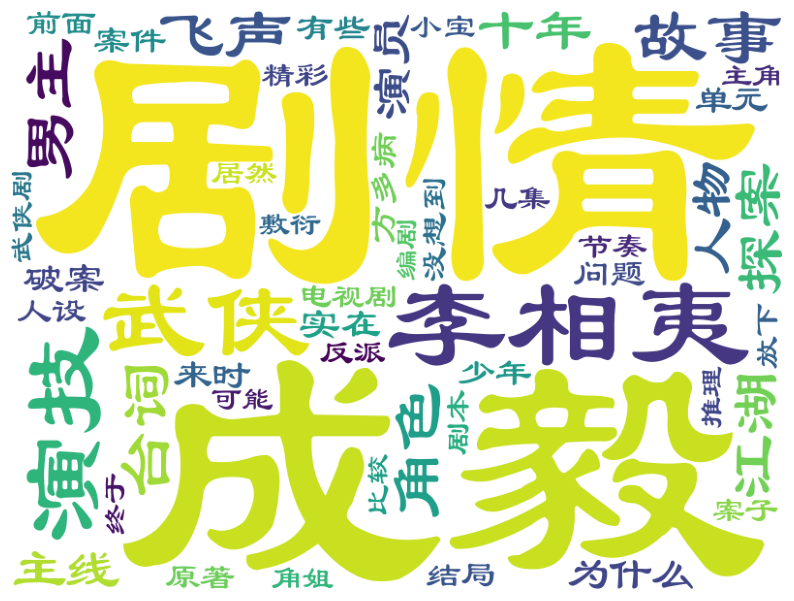

In [107]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 生成词云图
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path='HGLS_CNKI.TTF')
wordcloud.generate_from_frequencies(dict(wordsDict_l_seq[:50]))

# 显示词云图
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()